## Resolution Calculation in the Projection Domain

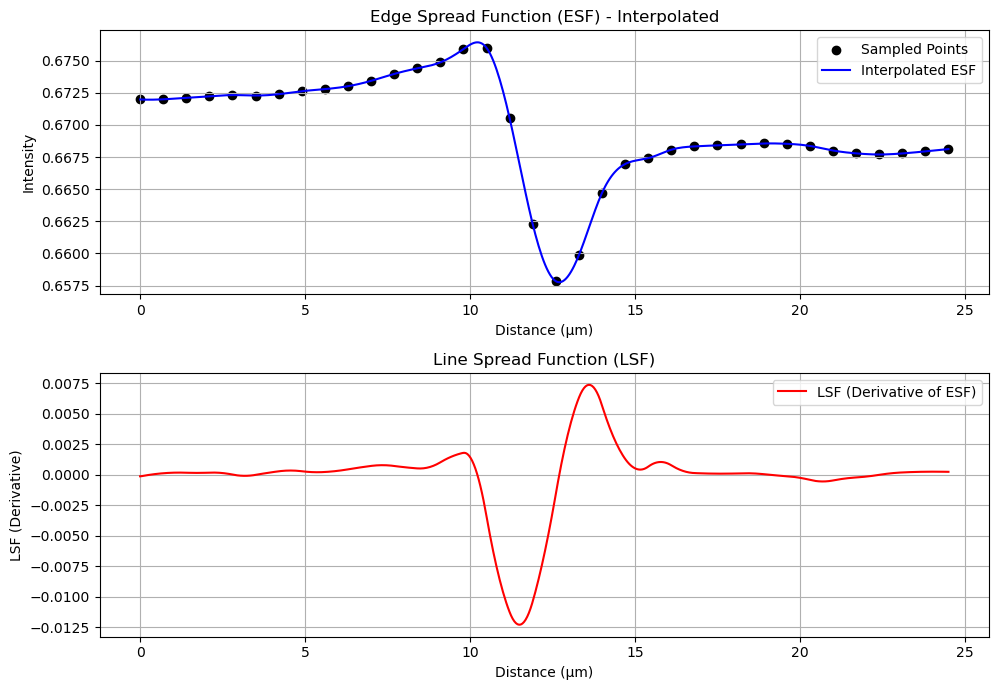

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
from scipy import interpolate
#

# Load the ESF data from the uploaded CSV
esf_file_path = './100proj_esf_Lstraight.csv'
colnames = ['X', 'Y']
esf = pd.read_csv(esf_file_path, names=colnames, header=None)
x_original = esf['X']
y_original = esf['Y']

# Create a finer x-axis for oversampling
x_fine = np.linspace(x_original.min(), x_original.max(), num=500)

# cubic spline interpolation of ESF
interp_function = interpolate.interp1d(x_original, y_original, kind='cubic')
y_fine = interp_function(x_fine)

# Calculate the derivative of the interpolated ESF (LSF)
lsf_fine = np.gradient(y_fine, x_fine)

# Plot the oversampled (interpolated) ESF and LSF
plt.figure(figsize=(10, 7))

# Plot ESF
plt.subplot(2, 1, 1)
plt.scatter(x_original, y_original, label="Sampled Points", color="black")
plt.plot(x_fine, y_fine, label="Interpolated ESF", color="blue")
plt.title("Edge Spread Function (ESF) - Interpolated")
plt.xlabel("Distance (\u03bcm)")
plt.ylabel("Intensity")
plt.grid(True)
plt.legend()

# Plot LSF
plt.subplot(2, 1, 2)
plt.plot(x_fine, lsf_fine, label="LSF (Derivative of ESF)", color="red")
plt.title("Line Spread Function (LSF)")
plt.xlabel("Distance (\u03bcm)")
plt.ylabel("LSF (Derivative)")
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Save the oversampled data for further analysis
esf_oversampled = pd.DataFrame({'X': x_fine, 'ESF': y_fine, 'LSF': lsf_fine})


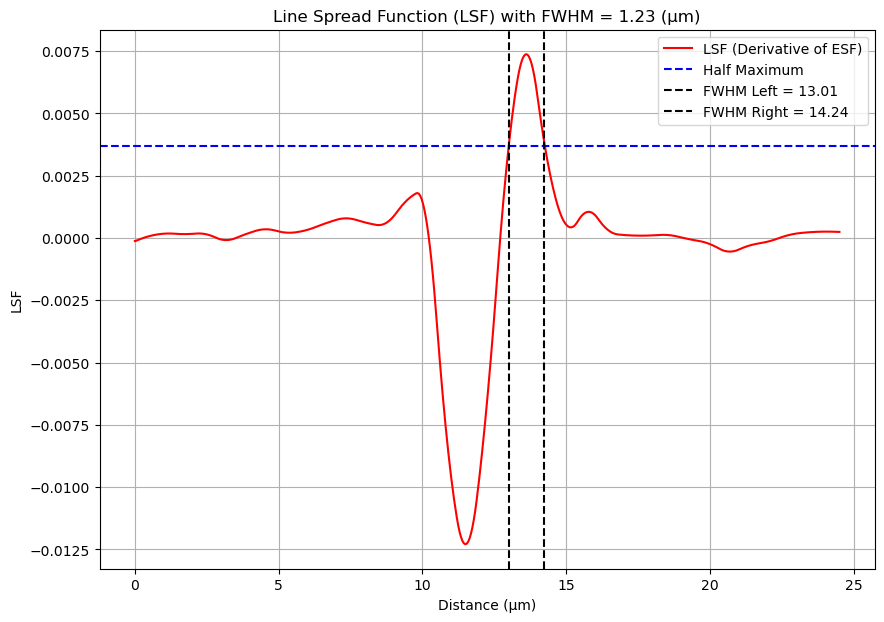

Empirical Resolution = 1.2274549098196381 μm


In [58]:
## Find the FWHM of the Line Spread Function (LSF)
# maximum value of the LSF
lsf_max = np.max(lsf_fine)
half_max = lsf_max / 2

# Find where the LSF crosses the half maximum value
indices_above_half_max = np.where(lsf_fine >= half_max)[0]

# calculate FWHM
fwhm_left = x_fine[indices_above_half_max[0]]
fwhm_right = x_fine[indices_above_half_max[-1]]
fwhm_value = fwhm_right - fwhm_left

# Plot the LSF with the FWHM
plt.figure(figsize=(10, 7))
plt.plot(x_fine, lsf_fine, label="LSF (Derivative of ESF)", color="red")
plt.axhline(half_max, color="blue", linestyle="--", label="Half Maximum")
plt.axvline(fwhm_left, color="black", linestyle="--", label=f"FWHM Left = {fwhm_left:.2f}")
plt.axvline(fwhm_right, color="black", linestyle="--", label=f"FWHM Right = {fwhm_right:.2f}")
plt.title(f"Line Spread Function (LSF) with FWHM = {fwhm_value:.2f} (\u03bcm)")
plt.xlabel("Distance (\u03bcm)")
plt.ylabel("LSF")
plt.grid(True)
plt.legend()
plt.show()

print(f"Empirical Resolution = {fwhm_value} \u03bcm")


### Not sure I am taking the "FWHM" from the correct portion of the curve...
 redoing with value of greatest magnitude which in this case is the FW half minimum

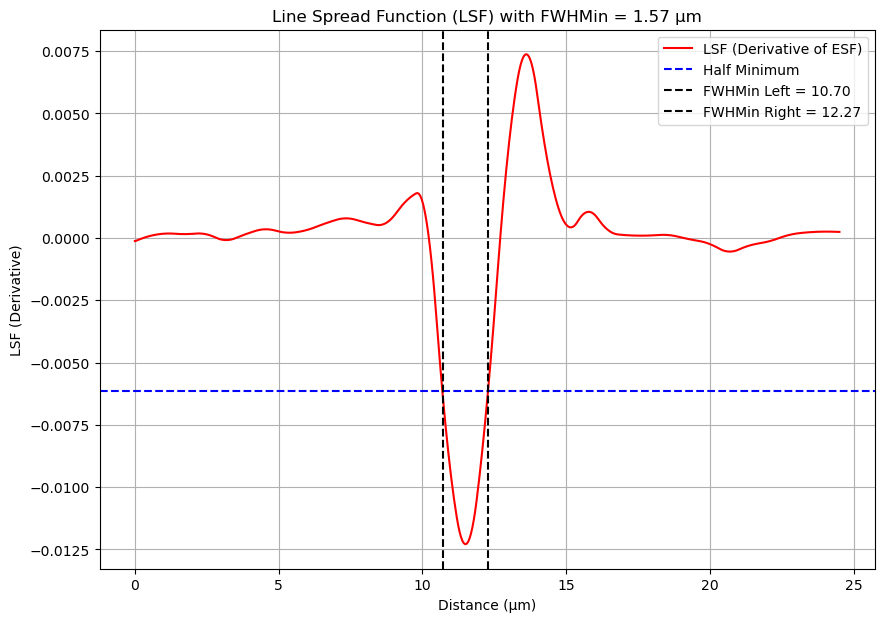

Empirical Resolution = 1.5711422845691398 μm


In [59]:
## Find the FWHM of the Line Spread Function (LSF)
# maximum value of the LSF

# Identify the minimum value of the LSF
lsf_min = np.min(lsf_fine)
half_min = lsf_min / 2

# Find where the LSF crosses the half minimum value (both left and right of the minimum)
indices_below_half_min = np.where(lsf_fine <= half_min)[0]

# The FWHMin is the distance between the first and last points where the LSF is below half minimum
fwhmin_left = x_fine[indices_below_half_min[0]]
fwhmin_right = x_fine[indices_below_half_min[-1]]
fwhmin_value = fwhmin_right - fwhmin_left

# Plot the LSF with the FWHMin
plt.figure(figsize=(10, 7))
plt.plot(x_fine, lsf_fine, label="LSF (Derivative of ESF)", color="red")
plt.axhline(half_min, color="blue", linestyle="--", label="Half Minimum")
plt.axvline(fwhmin_left, color="black", linestyle="--", label=f"FWHMin Left = {fwhmin_left:.2f}")
plt.axvline(fwhmin_right, color="black", linestyle="--", label=f"FWHMin Right = {fwhmin_right:.2f}")
plt.title(f"Line Spread Function (LSF) with FWHMin = {fwhmin_value:.2f} µm")
plt.xlabel("Distance (µm)")
plt.ylabel("LSF (Derivative)")
plt.grid(True)
plt.legend()
plt.show()

fwhmin_value

print(f"Empirical Resolution = {fwhmin_value} \u03bcm")

## Resolution Calculation in the Reconstruction Domain

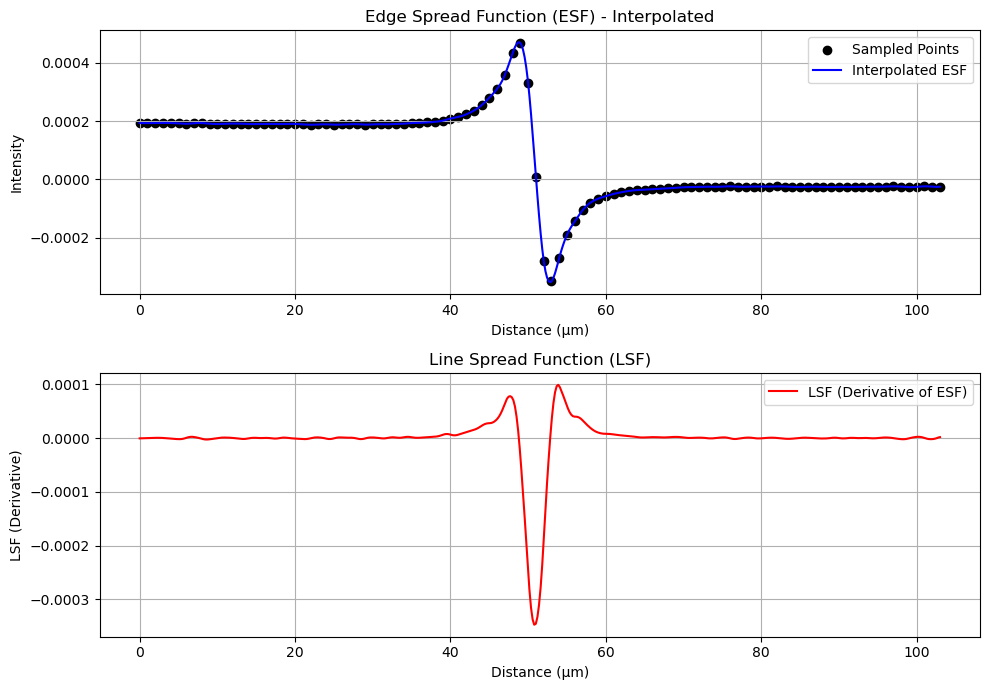

In [60]:
# Load the ESF data from the uploaded CSV
esf_file_path = './10avg_ramlak.csv'
colnames = ['X', 'Y']
esf = pd.read_csv(esf_file_path, names=colnames, header=None)
x_original = esf['X']
y_original = esf['Y']

# Create a finer x-axis for oversampling
x_fine = np.linspace(x_original.min(), x_original.max(), num=500)

# cubic spline interpolation of ESF
interp_function = interpolate.interp1d(x_original, y_original, kind='cubic')
y_fine = interp_function(x_fine)

# Calculate the derivative of the interpolated ESF (LSF)
lsf_fine = np.gradient(y_fine, x_fine)

# Plot the oversampled (interpolated) ESF and LSF
plt.figure(figsize=(10, 7))

# Plot ESF
plt.subplot(2, 1, 1)
plt.scatter(x_original, y_original, label="Sampled Points", color="black")
plt.plot(x_fine, y_fine, label="Interpolated ESF", color="blue")
plt.title("Edge Spread Function (ESF) - Interpolated")
plt.xlabel("Distance (\u03bcm)")
plt.ylabel("Intensity")
plt.grid(True)
plt.legend()

# Plot LSF
plt.subplot(2, 1, 2)
plt.plot(x_fine, lsf_fine, label="LSF (Derivative of ESF)", color="red")
plt.title("Line Spread Function (LSF)")
plt.xlabel("Distance (\u03bcm)")
plt.ylabel("LSF (Derivative)")
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Save the oversampled data for further analysis
esf_oversampled = pd.DataFrame({'X': x_fine, 'ESF': y_fine, 'LSF': lsf_fine})


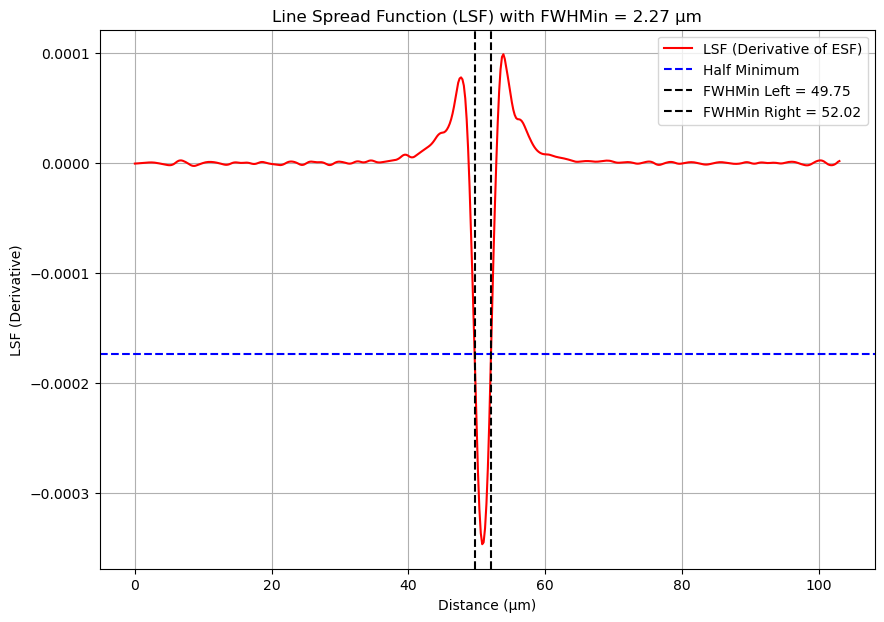

Empirical Resolution = 2.2705410821643284 μm


In [61]:
## Find the FWHM of the Line Spread Function (LSF)
# maximum value of the LSF

# Identify the minimum value of the LSF
lsf_min = np.min(lsf_fine)
half_min = lsf_min / 2

# Find where the LSF crosses the half minimum value (both left and right of the minimum)
indices_below_half_min = np.where(lsf_fine <= half_min)[0]

# The FWHMin is the distance between the first and last points where the LSF is below half minimum
fwhmin_left = x_fine[indices_below_half_min[0]]
fwhmin_right = x_fine[indices_below_half_min[-1]]
fwhmin_value = fwhmin_right - fwhmin_left

# Plot the LSF with the FWHMin
plt.figure(figsize=(10, 7))
plt.plot(x_fine, lsf_fine, label="LSF (Derivative of ESF)", color="red")
plt.axhline(half_min, color="blue", linestyle="--", label="Half Minimum")
plt.axvline(fwhmin_left, color="black", linestyle="--", label=f"FWHMin Left = {fwhmin_left:.2f}")
plt.axvline(fwhmin_right, color="black", linestyle="--", label=f"FWHMin Right = {fwhmin_right:.2f}")
plt.title(f"Line Spread Function (LSF) with FWHMin = {fwhmin_value:.2f} µm")
plt.xlabel("Distance (µm)")
plt.ylabel("LSF (Derivative)")
plt.grid(True)
plt.legend()
plt.show()

fwhmin_value

print(f"Empirical Resolution = {fwhmin_value} \u03bcm")
